In [1]:
# import required libraries and modules
import pandas as pd
import numpy as np
from datetime import date, datetime
from dateutil.relativedelta import *
from random import random, randint

from bokeh.io import output_notebook, show, push_notebook
from bokeh.layouts import column, row
from bokeh.plotting import figure
from bokeh.models import CustomJS, ColumnDataSource, Slider
output_notebook()

from ipywidgets import interact, interactive
import ipywidgets as widgets
from IPython.display import display, HTML

Loading BokehJS ...

In [2]:
def updateTrend(trendType, x, **kwargs):
    if trendType == 'Linear':
        m, c = kwargs['m'], kwargs['c']
        return m * x + c
    elif trendType == 'Curve':
        a, b, c = kwargs['a'], kwargs['b'], kwargs['c']
        return a*x*x + b*x + c 
    return c

def updateTrendPlot(level, startdate, intervalType, intervals):
    dateDelta = relativedelta(years = 1 if intervalType =='Years' else 0,
                          months = 1 if intervalType =='Months' else 0,
                          weeks = 1 if intervalType =='Weeks' else 0)
    r.data_source.data['x'] = [startdate + dateDelta * n for n in range(intervals)]
    r.data_source.data['y'] = [level for i in range(intervals)]
    push_notebook()

In [3]:
style = {'description_width': '100px'}

# base, starting number of items sold on week-0
level = widgets.IntText(value=100, description='Level')

# starting date of the data-set, picked at random
startdate = widgets.DatePicker(value=date(2008, 1, 1), description='StartDate')

# weeks, months, years
intervalType = widgets.Dropdown(options=[('Years'),('Months'),('Weeks')], value='Months', description='Interval Type')

# starting date of the data-set, picked at random
intervals = widgets.IntText(value=10, description='Intervals', disabled=False)

# type of trend
trend = widgets.Dropdown(options=[('Constant'),('Linear'),('Curve')], value='Constant', description='Trend')


In [15]:
def updateBasePlot(level, startdate, intervalType, intervals):
    dateDelta = relativedelta(years = 1 if intervalType =='Years' else 0,
                          months = 1 if intervalType =='Months' else 0,
                          weeks = 1 if intervalType =='Weeks' else 0)
    startdate = datetime(startdate.year, startdate.month, startdate.day)
    r.data_source.data['x'] = [(startdate + dateDelta * n) for n in range(intervals)]
    r.data_source.data['y'] = [level for n in range(intervals)]
    push_notebook()
    

# bokeh's internal range setting doesn't allow datetime.date, it needs datetime.datetime
startdatetime = datetime(startdate.value.year, startdate.value.month, startdate.value.day)

# setting default values for the plot
dateDelta = relativedelta(months = 1)
x = [startdatetime + dateDelta * n for n in range(intervals.value)]
y = [level.value for n in range(intervals.value)]
s1 = ColumnDataSource(data=dict(x=x, y=y))

# create the plot
p = figure(x_axis_type="datetime", plot_width=720, plot_height = 200, title = '01. Default Sales Data')
r = p.line(x='x', y='y', source=s1, line_width=2)

In [16]:
display(HTML('<h2>Setting up the starting values<h2>'))
show(p, notebook_handle=True)
interact(updateBasePlot, level=level, startdate=startdate, intervalType=intervalType, intervals=intervals)


interactive(children=(IntText(value=160, description='Level'), DatePicker(value=datetime.date(2008, 8, 1), des…

<function __main__.updateBasePlot(level, startdate, intervalType, intervals)>

In [6]:
display(HTML('<h2>Choose the trend-type</h2>'))
display(trend)

Dropdown(description='Trend', options=('Constant', 'Linear', 'Curve'), value='Constant')

In [21]:
startdatetime = datetime(startdate.value.year, startdate.value.month, startdate.value.day)
x = [startdatetime + dateDelta * n for n in range(intervals.value)]
y = [level.value for i in range(intervals.value)]
x_num = [n for n in range(intervals.value)]

source = ColumnDataSource(data=dict(x=x, y=y, x_num=x_num))

plot = figure(x_axis_type="datetime", plot_width = 720, plot_height=200, title="02. Apply TREND to the data")
plot.line(x='x', y='y', source=source, line_width=2)

sliderA = Slider(start=-2.0, end=2.0, value=0, step=.1, title="A")
sliderB = Slider(start=-20, end=20, value=0, step=.1, title="B")
    
update_curve = CustomJS(args=dict(source=source, A=sliderA, B=sliderB, C=level.value), code="""
    var data = source.data;
    var x = data['x_num'];
    var y = data['y'];
    for (var i = 0; i < x.length; i++) {
        y[i] = A.value * x[i] * x[i] + B.value * x[i] + C;
    }
    source.change.emit();
""")
col = column(plot)
if trend.value == 'Linear':
    display(HTML('<h2>Choose the Slope(<code>y = Bx + c</code>)</h2>'))
    col = column(plot, sliderB)
    sliderB.js_on_change('value', update_curve)
elif trend.value == 'Curve':
    display(HTML('<h2>Choose A and B: (<code>y = Ax<sup>2</sup> + Bx + c </code>)</h2>'))
    col = column(plot, sliderA, sliderB)
    sliderA.js_on_change('value', update_curve)
    sliderB.js_on_change('value', update_curve)
else:
    display(HTML('<h2>Trend is Constant (<code>y = level</code>)'))
show(col)

interactive(children=(IntSlider(value=100, description='A', max=300, min=-100), IntSlider(value=4, description…

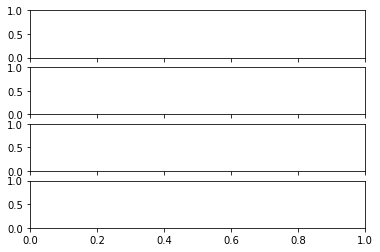

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

display(HTML('<h2>Choose the seasonal pattern</h2>'))

x = np.linspace(1, intervals.value, intervals.value, endpoint=False)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)

def f_sin(A, w, p):
    sin1 = level.value + A * np.sin(2 * np.pi* w * x - p)
    ax1.plot(x, sin1)

i1 = interactive(f_sin, A=100, w=4, p=2)

display(i1)


In [10]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# # define axes if we want to put multiple plots in the same fig
# ax = plt.gca()

# df.plot(kind='line', x='week', y='baseline', color='blue', figsize=(12, 6), ax=ax)
# df.plot(kind='line', x='week', y='final', color='red', figsize=(12, 6), ax=ax)
# plt.show()

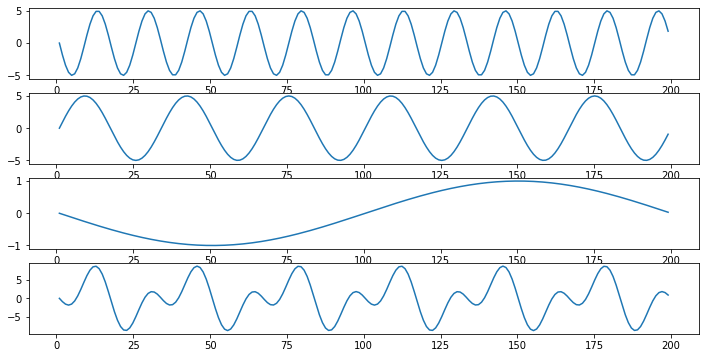

In [11]:
import matplotlib.pyplot as plt
from scipy import signal

t = np.linspace(1, 200, 200, endpoint=False)

plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
sig1 = 5 * np.sin(2 * np.pi * t * 12)
plt.plot(t, sig1)

plt.subplot(4, 1, 2)
sig2 = 5 * np.sin(-2 * np.pi * t * 6)
plt.plot(t, sig2)

plt.subplot(4, 1, 3)
sig3 = 1 * np.sin(2 * np.pi * t )
plt.plot(t, sig3)

plt.subplot(4, 1, 4)
sig4 = sig1 + sig2 
plt.plot(t, sig4)


In [12]:
# the simplest form of periodic data is y(t) =A cos(ωt) +B sin(ωt)
# The period of y(t) is the shortest time taken for y(t) to repeat itself, and it is 2π/ω
# y(t) =(k=1 to infinity)∑[A_k cos(ω_k t) + B_k sin(ω_k t)]
# Fourier expansion of y(t)